<a href="https://colab.research.google.com/github/kcalizadeh/phil_nlp/blob/master/dash_text_analysis_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports and Mounting Drive

In [1]:
# this cell mounts drive, sets the correct directory, then imports all functions
# and relevant libraries via the functions.py file
from google.colab import drive
import sys

# install relevent libraries not included with colab
!pip install lime
!pip install symspellpy

drive.mount('/gdrive',force_remount=True)

drive_path = '/gdrive/MyDrive/Colab_Projects/Phil_NLP'

sys.path.append(drive_path)

     |████████████████████████████████| 276kB 5.6MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=6acf1a255d27137d6347188d510702be38f534b1a01427f5512e2a4d7200ac07
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
     |████████████████████████████████| 2.6MB 5.7MB/s 
Mounted at /gdrive


In [2]:
from functions import *
%load_ext autoreload
%autoreload 2

np.random_seed=17

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Load Data

In [3]:
df = pd.read_csv('/gdrive/MyDrive/Colab_Projects/Phil_NLP/phil_nlp.csv')

df.sample(5)

,title,author,school,sentence_spacy,sentence_str,sentence_length,sentence_lowered,lemmatized_str,tokenized_txt
189954,madness and civilization,foucault,continental,"As a consequence and degradation of that, it w...","As a consequence and degradation of that, it w...",129,"as a consequence and degradation of that, it w...","as a consequence and degradation of that , -P...","['As', 'a', 'consequence', 'and', 'degradation..."
214976,anti-oedipus,deleuze,continental,Nijinsky wrote: I am God,Nijinsky wrote: I am God,24,nijinsky wrote: i am god,Nijinsky write : -PRON- be God,"['Nijinsky', 'wrote', ':', 'I', 'am', 'God']"
194561,madness and civilization,foucault,continental,: Work will be proportional to strength and th...,: Work will be proportional to strength and th...,121,: work will be proportional to strength and th...,: work will be proportional to strength and t...,"[':', 'Work', 'will', 'be', 'proportional', 't..."
152200,papers vol 1,lewis,analytic,"More precisely: a regularity, in action or in ...","More precisely: a regularity, in action or in ...",124,"more precisely: a regularity, in action or in ...","more precisely : a regularity , in action or ...","['More', 'precisely', ':', 'a', 'regularity', ..."
322466,political economy,ricardo,capitalism,"If a tax, however burdensome it may be, falls ...","If a tax, however burdensome it may be, falls ...",139,"if a tax, however burdensome it may be, falls ...","if a tax , however burdensome -PRON- may be ,...","['If', 'a', 'tax', ',', 'however', 'burdensome..."


In [30]:
stopwords_list = stopwords.words('english') + list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘"]
custom_stopwords = ['–', 'also', 'something', 'cf', 'thus', 'two', 'now', 'would', 
                    'make', 'eb', 'u', 'well', 'even', 'said', 'eg', 'us',
                    'n', 'sein', 'e', 'da', 'therefore', 'however', 'would', 
                    'thing', 'must', 'merely', 'way', 'since', 'latter', 'first',
                    'B', 'mean', 'upon', 'yet', 'cannot', 'c', 'C', 'let', 'may', 
                    'might', "'s", 'b', 'ofthe', 'p.', '_', '-', 'eg', 'e.g.',
                    'ie', 'i.e.', 'f', 'l', "n't", 'e.g', 'i.e', '—', '--', 
                    'hyl', 'phil', 'one'] + stopwords_list

In [27]:
classifier_dict = {}
for author in df['author'].unique():
  classifier_dict[author] = 'author'
for title in df['title'].unique():
  classifier_dict[title] = 'title'
for school in df['school'].unique():
  classifier_dict[school] = 'school'

### Word Cloud Function

In [19]:
# this function takes as inputs an author, title, or school, and returns 
# a word cloud for that group's texts

def make_word_cloud(input, stopwords=stopwords.words('english')):
    text = ''
    for sentence in df[df[classifier_dict[input]]==input]['sentence_str']:
      text += sentence
    cloud = wordcloud.WordCloud(width=2000, 
                            height=1100, 
                            background_color='#D1D1D1', 
                            max_words=30, 
                            stopwords=stopwords, 
                            color_func=lambda *args, **kwargs: (95,95,95)).generate(text)
    return cloud

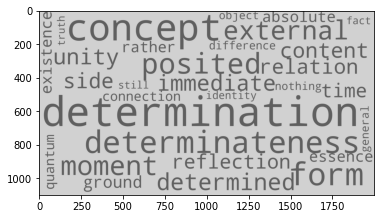

In [32]:
# testing it out
plt.imshow(make_word_cloud('the science of logic', stopwords=custom_stopwords))

### Average Word Length Function

In [68]:
def get_average_word_length(input):
  punctuations = list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘", '[', '[']
  num_words = 0
  sum_word_lengths = 0
  for sentence in df[df[classifier_dict[input]]==input]['tokenized_txt']:
    sentence_list = sentence.split()
    sentence_list = [re.sub("[',]", '', word) for word in sentence_list]
    no_punctuation_tokens = [word for word in sentence_list if word not in punctuations]
    no_punctuation_tokens = [word for word in no_punctuation_tokens if len(word) > 0]
    for word in no_punctuation_tokens:
      num_words += 1
      sum_word_lengths += len(word)
  return sum_word_lengths / num_words

In [70]:
# test it out
for school in df['school'].unique():
  print(school)
  print(get_average_word_length(school))
  print()

plato
4.219800084945763

aristotle
4.316441579485012

empiricism
4.500572602099245

rationalism
4.439002183955361

analytic
4.544839803887312

continental
4.8112526414942645

phenomenology
4.7367242048362455

german_idealism
4.725714199829411

communism
4.769301039274698

capitalism
4.620634322859528



### Average Sentence Length Function

In [71]:
def get_average_sentence_length(input):
  punctuations = list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘", '[', ']']
  num_sentences = 0
  sum_sentence_lengths = 0
  for sentence in df[df[classifier_dict[input]]==input]['tokenized_txt']:
    sentence_list = sentence.split()
    no_punctuation_tokens = [word for word in sentence_list if word not in punctuations]
    no_punctuation_tokens = [word for word in no_punctuation_tokens if len(word) > 0]
    num_sentences += 1
    sum_sentence_lengths += len(no_punctuation_tokens)
  return sum_sentence_lengths / num_sentences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# testing
for school in df['school'].unique():
  print(school)
  print(get_average_sentence_length(school))
  print()

plato
23.9527197852321

aristotle
30.391855346532697

empiricism
36.65442944785276

rationalism
32.76701012999435

analytic
23.665816848726205

continental
32.26270636792453

phenomenology
27.58667644286163

german_idealism
34.10015605050362

communism
29.05610799400033

capitalism
36.516657534246576



### Median Sentence Length Function

In [83]:
def get_median_sentence_length(input):
  punctuations = list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘", '[', ']']
  sentence_lengths = []
  for sentence in df[df[classifier_dict[input]]==input]['tokenized_txt']:
    sentence_list = sentence.split()
    no_punctuation_tokens = [word for word in sentence_list if word not in punctuations]
    no_punctuation_tokens = [word for word in no_punctuation_tokens if len(word) > 0]
    sentence_lengths.append(len(no_punctuation_tokens))
  return np.median(sentence_lengths)

In [86]:
for author in df['author'].unique():
  print(author)
  print(get_median_sentence_length(author))
  print()

plato
20.0

aristotle
26.0

locke
34.0

hume
33.0

berkeley
23.0

spinoza
25.0

leibniz
28.0

descartes
42.0

malebranche
29.0

russell
26.0

moore
30.0

wittgenstein
16.0

lewis
19.0

quine
21.0

popper
23.0

kripke
21.0

foucault
30.0

derrida
23.0

deleuze
26.0

merleau-ponty
29.0

husserl
29.0

heidegger
20.0

kant
33.0

fichte
27.0

hegel
29.0

marx
24.0

lenin
28.0

smith
33.0

ricardo
33.0

keynes
32.0

